In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 16

# CP1 Blatt5 Abgabe Lapp & Brieden

## erstellt von Tobias Lapp und Sven Brieden am 25.11.2017

## Aufgabe 5.1: Spectra of nucleons

Seien:  
$R_a = \dfrac{U_{12}}{I_{13}}$ und $R_b = \dfrac{U_{24}}{I_{24}}$ und $e^{-\pi\frac{R_a}{R_s}} + e^{-\pi\frac{R_b}{R_s}}=1$

mit $R_s$ als gesuchet Größe

a)
Zu zeigen ist, dass mit den einheitelos Größen:
$x = π\dfrac{R_a}{R_s}$ und $\rho =\dfrac{R_b}{R_a}$<br />
die Gleichung folgende Form annimmt:
$e^{−x} + e^{−ρx} = 1$

$$
\begin{array}
11 &=& e^{-\pi\frac{R_a}{R_s}} + e^{-\pi\frac{R_b}{R_s}}\\
&=& e^{-\pi\frac{R_a}{R_s}\cdot\frac{x}{π\frac{R_a}{R_s}}} + e^{-\pi\frac{R_b}{R_s}\cdot\frac{x}{π\frac{R_a}{R_s}}\cdot\frac{\rho}{\frac{R_b}{R_a}}}\\
&=& e^{-\not{\pi}\frac{\not{R_a}}{\not{R_s}}\cdot\frac{x}{\not{π}\frac{\not{R_a}}{\not{R_s}}}} + e^{-\not{\pi}\frac{\not{R_b}}{\not{R_s}}\cdot\frac{x}{\not{π}\frac{\not{R_a}}{\not{R_s}}}\cdot\frac{\rho}{\frac{\not{R_b}}{\not{R_a}}}}\\
&=& e^{−x} + e^{−ρx}
\end{array}
$$

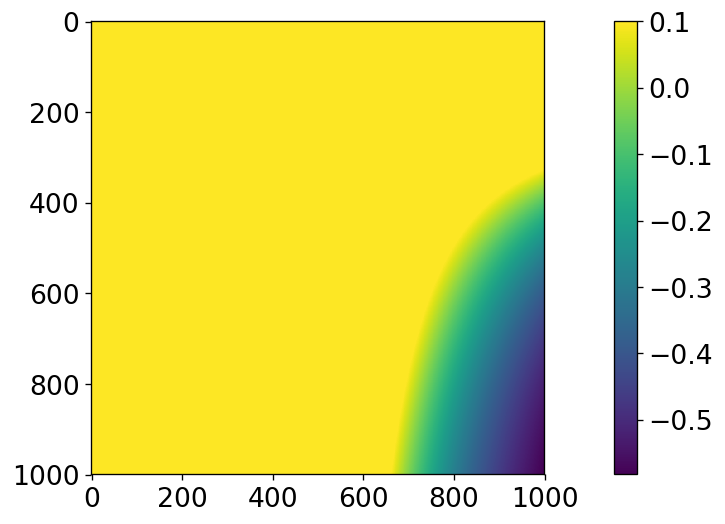

In [144]:
### numerische methode
f = lambda x,ρ: np.exp(-x) + np.exp(-ρ * x) - 1 # = 0
x, y = np.linspace(-1,1,1000), np.linspace(-1,3,1000)
X,Y = np.meshgrid(x,y)
plt.imshow(f(X,Y), vmax = 0.1)
plt.colorbar()

## Aufgabe 5.2: Van der Pauw’s method for the determination of resistivities

## Aufgabe 5.3: Particles on a line

What happens if the stepsize in the gradient method becomes too large?
Instead of computing the derivatives analytically, you may also compute them numerically:
do you notice any differences?

In [99]:
N = 4
#V = lambda
x_liste = 2 * np.random.rand(N) -1
#x_liste = np.array([0,0.01,0.1])

V_r = lambda x_1, x_2: 1 / abs(x_1 - x_2)
def V_x1_xN(x_i,y):
    V = 0
    for x in x_i:
        V = 0.5 * x*x
        if x!=y:
            V = 0.5 * V_r(x,y) 
    return V
#V_x1_xN = lambda x_i: 0.5 * sum([x*x for x in x_liste]) + 0.5 * sum([V_r(abs())])
def test(x_i,y_i):
    liste = []
    for y in y_i:
         liste.append( V_x1_xN(x_liste,y))
    return liste
#plt.hist(x, bins=100)

[]

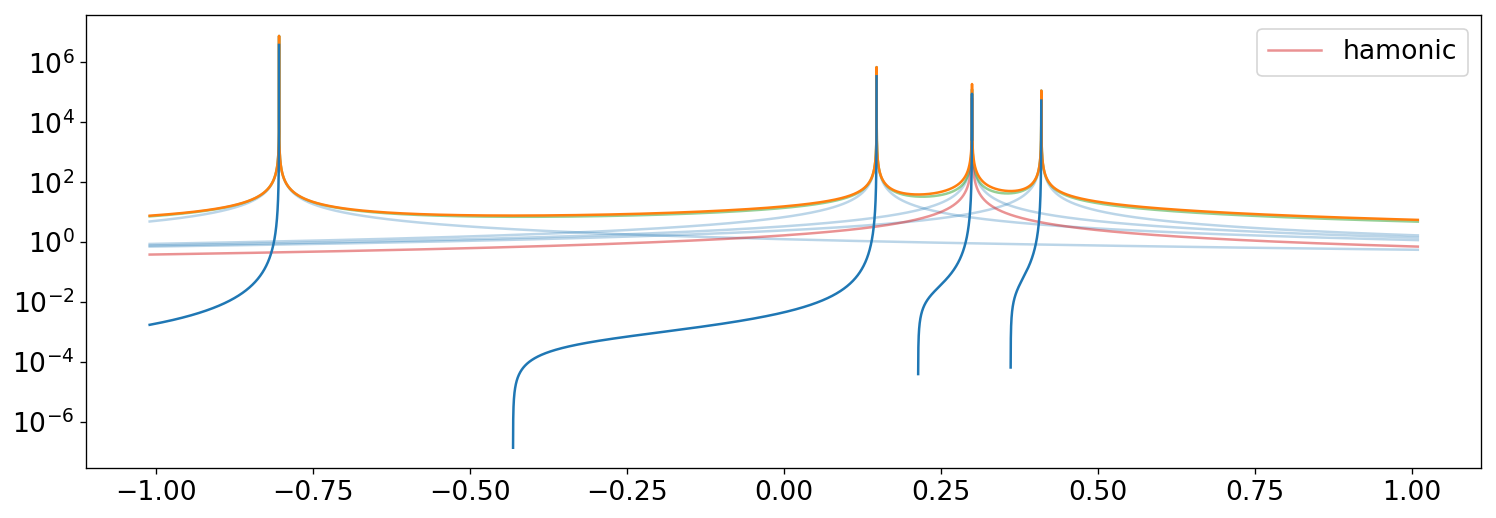

In [100]:
N_x = 30000
x = np.linspace(-1.01, 1.01, N_x)
V_r_liste = np.empty([N,N_x])
for n, x_i in enumerate(x_liste):
    plt.plot(x, V_r(x, x_i), alpha = 0.3, c="C0")
    V_r_liste[n] = np.array([V_r(x ,x_i)])
plt.vlines(x_liste,-10,1000, alpha = 0.1)
#plt.ylim(-100,100)
harmonic = np.array(test(x_liste,x))
potential = harmonic + V_r_liste.sum(axis=0)
plt.plot(x, V_r_liste.sum(axis=0),c = "C2", alpha = 0.5)
plt.plot(x, harmonic,c = "C3", alpha = 0.5, label= "hamonic")
plt.plot(x, potential, c = "C1"), plt.legend()
plt.plot(x, np.gradient(potential))
plt.semilogy()

In [97]:
n_iteraton = 15

def f(x0):
    return float(test(x_liste,[x0])[0])

def df(x0):
    return np.interp(x0, x, np.gradient(test(x_liste,x)))

def new_position(x_liste, x0):
    return  x0 - f(x0)/df(x0)

x_listen = np.empty([n_iteraton,N])
x_listen[0] = x_liste
for n in range(n_iteraton-1):
    for i, x_i in enumerate(x_listen[n]):
        x_listen[n+1,i] = new_position(x_listen[n], x_i)

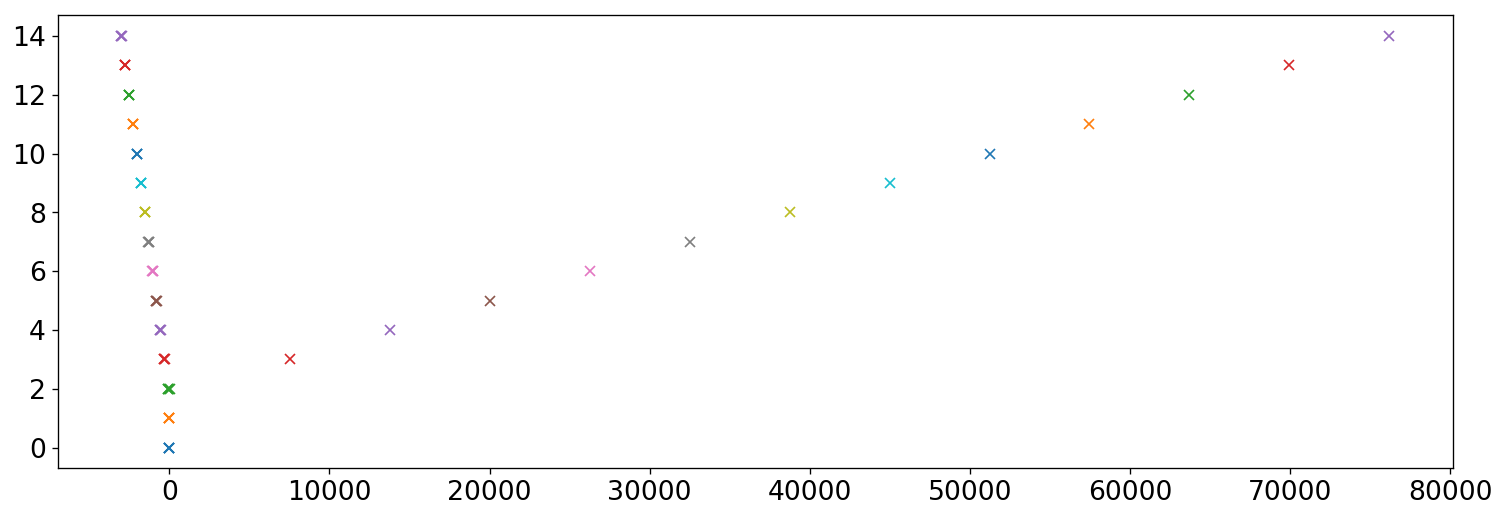

In [98]:
for n, x_e in enumerate(x_listen):
    plt.plot(x_e,x_e*0 + n,"x")
#plt.plot(x,  np.array(test(x_listen[-1],x)), c = "C1")


## Neuanfang 5.3

In [389]:
def V(x_Particles, nr_particle, x_potential):
    V = 0
    for i in range(len(x_Particles)):
        V -= 0.5 * x_Particles[i]
        if i!=nr_particle:
            V -= 0.5/abs(x_Particles[i] - x_potential)
    return V
def dV_dx(x_Particles, nr_particle, x_potential):
    dV = 0
    for i in range(len(x_Particles)):
        if i!=nr_particle:
            dV += (x_Particles[i] - x_potential)/abs(x_Particles[i] - x_potential)**3
    return dV
    
N = 4
x_liste = 2 * np.random.rand(N) - 1
x_achse = np.linspace(-1, 1, 5000)

(-1000, 2500)

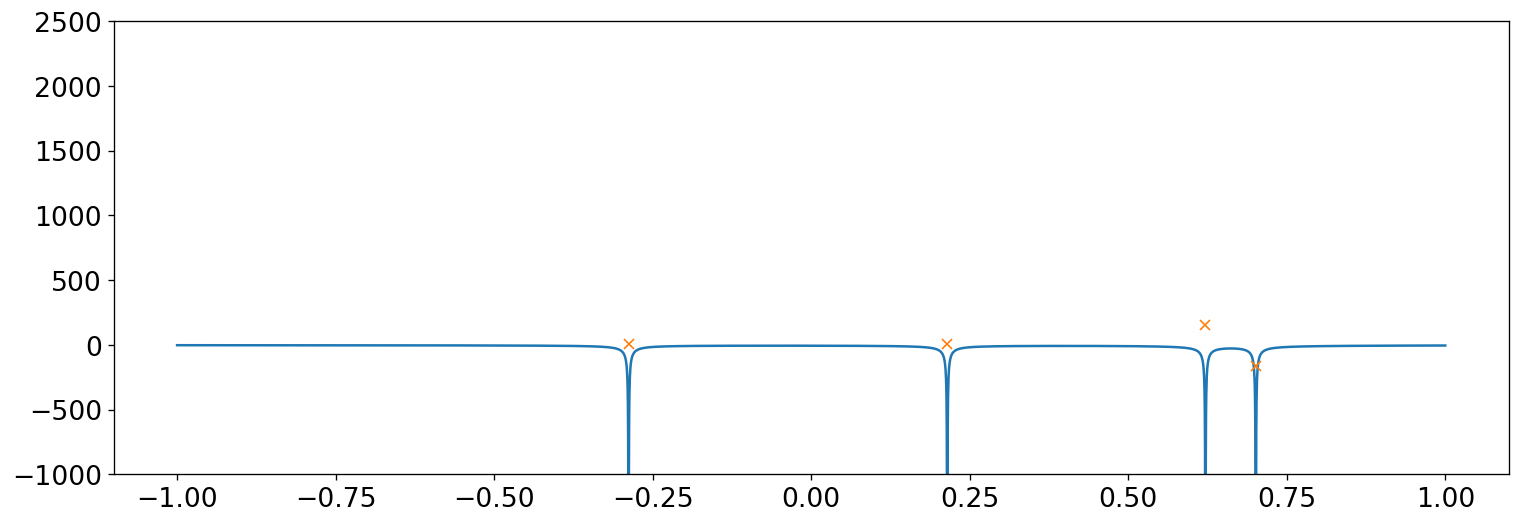

In [390]:
y = np.empty_like(x_achse)
for k, x in enumerate(x_achse):
    y[k] = V(x_liste, -1, x)
plt.plot(x_achse,y)    

"""for k, x in enumerate(x_achse):
    y[k] = V(x_liste, 1, x)
plt.plot(x_achse+0.01,y)  
"""
y = np.empty_like(x_liste)
for k, x in enumerate(x_liste):
    y[k] = dV_dx(x_liste, k, x_liste[k])
plt.plot(x_liste,y,"x")  
#plt.plot(x_achse)
plt.ylim(-1000,2500)

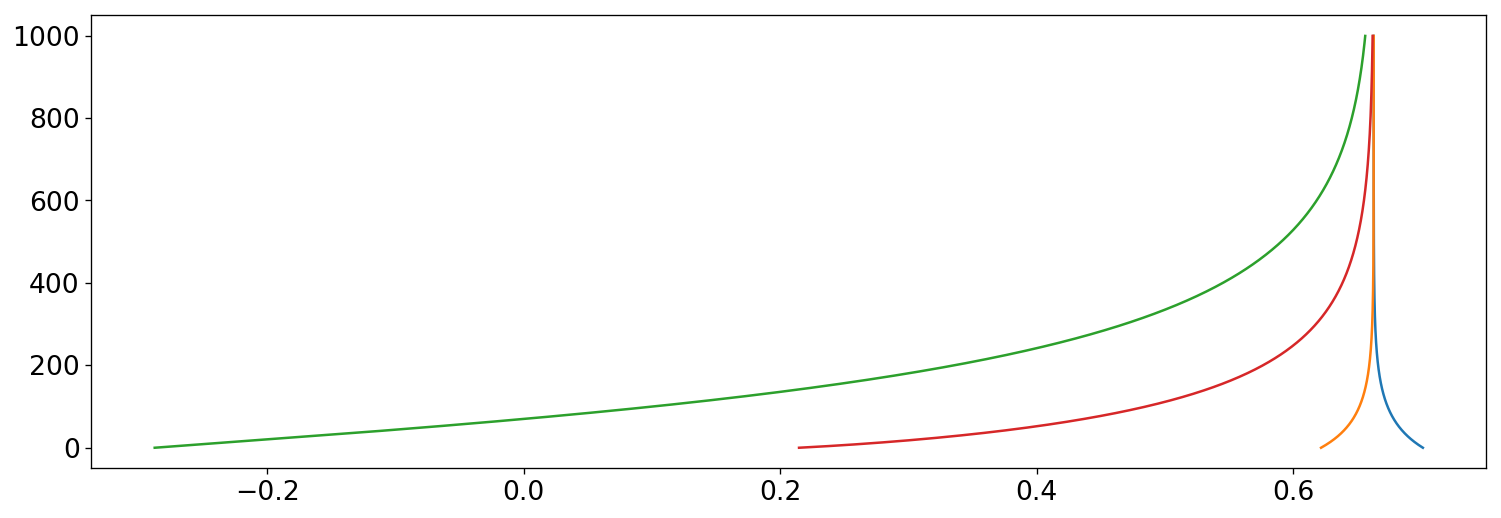

In [391]:
n_iteraton = 100000

def new_position(x_liste, x0):
    return  x0 - f(x0)/df(x0)

x_listen = np.empty([n_iteraton,N])
x_listen[0] = x_liste
for n in range(n_iteraton-1):
    for i in range(len(x_listen[n])):
        x_listen[n+1,i] = x_listen[n,i] - 0.0001*V(x_listen[n], i, x_listen[n,i])/dV_dx(x_listen[n], i, x_listen[n,i])
        
for p in range(N):
    plt.plot(x_listen[::100,p],range(int(n_iteraton/100)))

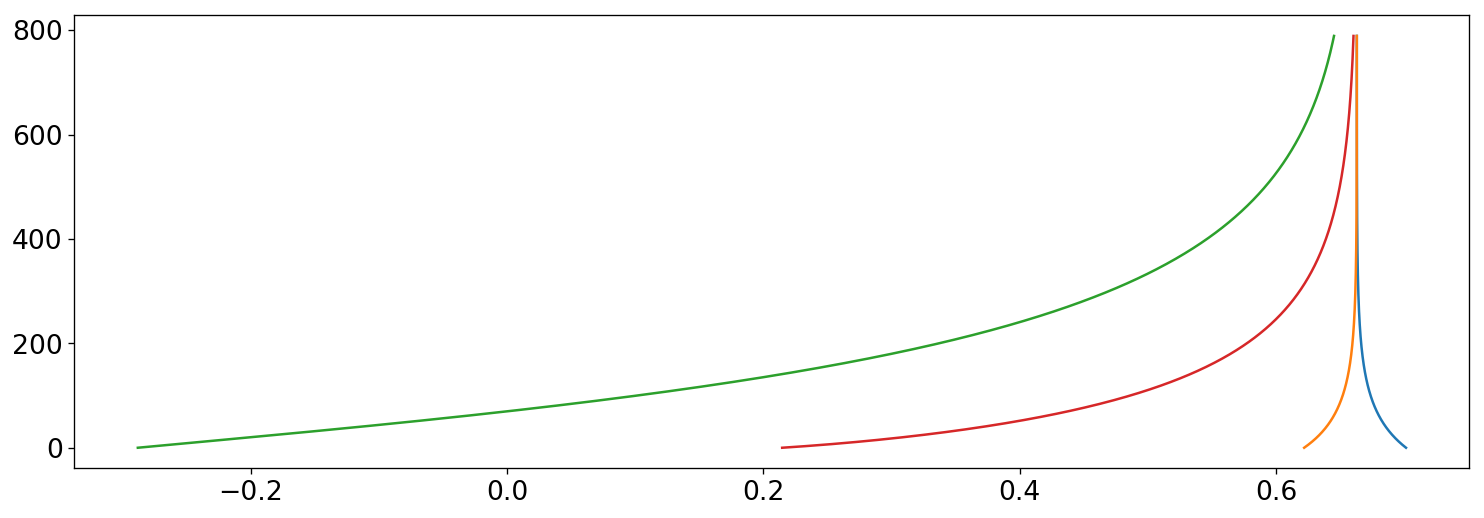

In [393]:
accurancy = 0.0001

def new_position(x_liste, x0):
    return  x0 - f(x0)/df(x0)

x_listen = []
x_listen.append(x_liste)
l = 0
ii = range(N)
while 1:
    x_listeee = []
    for i in ii:
        x_listeee.append(x_listen[l][i] - .01*V(x_listen[l], i, x_listen[l][i])/dV_dx(x_listen[l], i, x_listen[l][i]))
    x_listen.append(x_listeee)
    l += 1
    if sum(np.array(x_listen[l]) - np.array(x_listen[l-1])) < accurancy:
        break
        
x_listen = np.array(x_listen)
for p in range(N):
    plt.plot(x_listen[:,p],range(len(x_listen)))

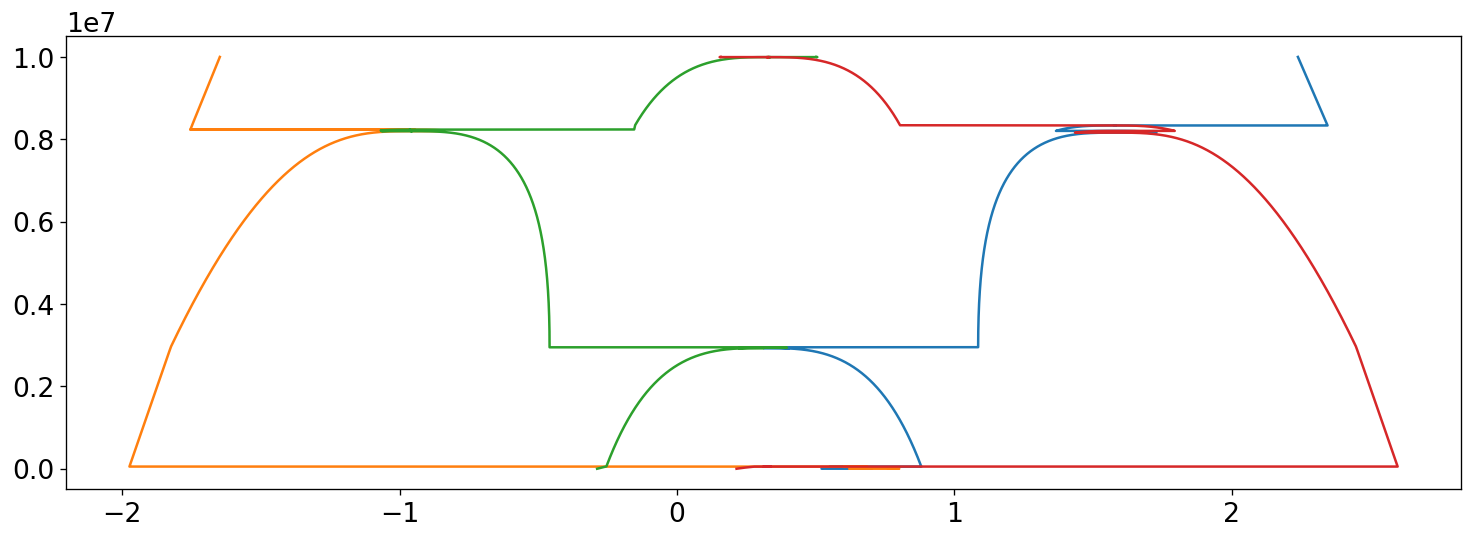

In [396]:
accurancy = 0.0001
Schrittweite = 0.0000001
def new_position(x_liste, x0):
    return  x0 - f(x0)/df(x0)
x_listen = []
x_listen.append(x_liste)
l = 0
ii = range(N)
#while 1:
for v in range(10000000):
    x_listeee = []
    for i in ii:
        x_listeee.append(x_listen[l][i] + Schrittweite * dV_dx(x_listen[l], i, x_listen[l][i]))
    x_listen.append(x_listeee)
    l += 1
    #if sum(np.array(x_listen[l]) - np.array(x_listen[l-1])) < accurancy:
        #break
        
x_listen = np.array(x_listen)
for p in range(N):
    plt.plot(x_listen[:,p],range(len(x_listen)))

In [339]:
x_listen[-1].sort(), x_listen[-1]

(None, array([-0.34081482, -0.33810957, -0.33732536, -0.33710735, -0.33706721,
        -0.33706704, -0.33699423, -0.13355773, -0.13347935, -0.13347921,
        -0.13343923, -0.13311823,  0.2662802 ,  0.26628056,  0.49928482,
         0.49939483,  0.49939508,  0.49957799,  0.7337818 ,  0.73378251]))


## Neuanfang 5.3 in schön

In [9]:
def V(x_Particles, nr_Particle):
    V = 0.5 * sum(x_Particles)
    for i in range(len(x_Particles)):
        if i!=nr_Particle:
            V -= 0.5/abs(x_Particles[i] - x_Particles[nr_Particle])
    return V

def dV_dx(x_Particles, nr_Particle):
    dV = 0
    for i in range(len(x_Particles)):
        if i!=nr_Particle:
            dV += (x_Particles[i] - x_Particles[nr_Particle])/abs(x_Particles[i] - x_Particles[nr_Particle])**3
    return dV

def plot(name):
    x_Particles_list_p = np.array(x_Particles_list)
    for p in range(N):
        plt.plot(x_Particles_list_p[:,p],range(len(x_Particles_list)), label= "particle nr. %i"%p)
    plt.title(name), plt.ylabel("Iteration"), plt.xlabel("position x"), plt.legend(), plt.show()

def Newton_Iteration():
    x = []
    for j in range(N):
        x.append(x_Particles_list[i][j] - 0.1 * V(x_Particles_list[i], j)/dV_dx(x_Particles_list[i], j))
    x_Particles_list.append(x)
    
def Gradient_Iteration():
    x = []
    for j in range(N):
        x.append(x_Particles_list[i][j] + Schrittweite * dV_dx(x_Particles_list[i],j))
    return x
   

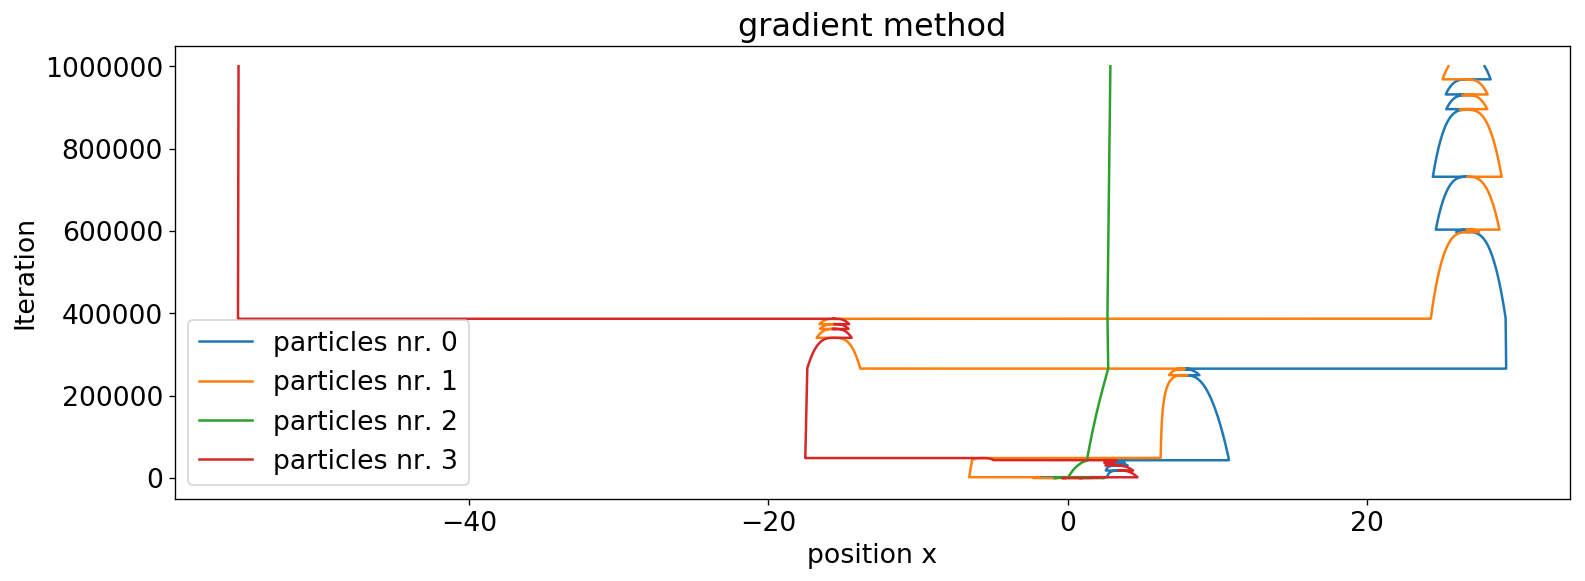

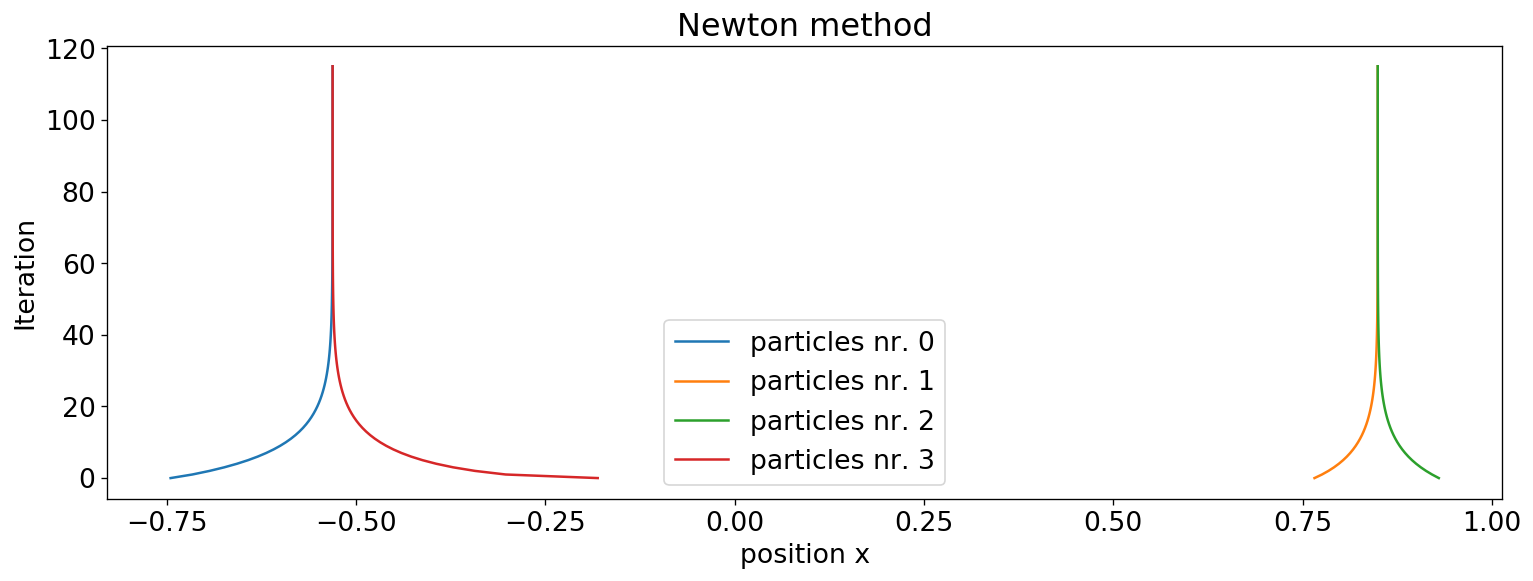

In [10]:
N = 4
accurancy = 0.0000001
Schrittweite = 0.0001

x_Particles_list = []
x_Particles_list.append(2 * np.random.rand(N) - 1)

for i in range(1000000):
    x_new = Gradient_Iteration()
    x_Particles_list.append(x_new)        
plot("Gradient method")

x_Particles_list = [x_Particles_list[0]]
i = 0
while True:
    Newton_Iteration()
    i += 1
    if max(np.array(x_Particles_list[i]) - np.array(x_Particles_list[i-1])) <= accurancy:
        break      
plot("Newton method")

In [443]:
x_listen[-1].sort(), x_listen[-1]

(None, array([-0.48358601, -0.48358583, -0.48311298, -0.47794188]))

## Aufgabe 5.4: Symmetric many particle equilibria

In [466]:
[x_Particles_list]

[[array([ 0.44692959,  0.21518013, -0.99632163, -0.95421459]),
  [0.42905485041789981,
   0.23634632107430809,
   -0.9939722978715877,
   -0.95657843711924728],
  [0.41492080619799038,
   0.25223842877783492,
   -0.9919101245122719,
   -0.95865059185074275],
  [0.40349739236014331,
   0.26466398727167378,
   -0.99009470405649413,
   -0.96047294071706124],
  [0.39411208898193401,
   0.27464666353462924,
   -0.98849252398808751,
   -0.96207996405503982],
  [0.38630074348572968,
   0.28282607283345468,
   -0.98707547830528763,
   -0.96350041422671096],
  [0.3797304733252399,
   0.28962900110380979,
   -0.9858198002871511,
   -0.96475849625385324],
  [0.37415548205763399,
   0.29535409476446067,
   -0.98470525719523483,
   -0.96587474336389167],
  [0.36938998171992932,
   0.30021806383959321,
   -0.98371452580409213,
   -0.96686668653467323],
  [0.36529078354709721,
   0.30438275817969551,
   -0.98283269945389462,
   -0.96774937703935171],
  [0.36174568625774906,
   0.30797192919724969,
  